<a href="https://colab.research.google.com/github/blackJJW/ML/blob/main/self_study_ML/chapter3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book : '혼자 공부하는 머신러닝 + 딥러닝', 박해선 지음, 한빛미디어

# 03-1 k-최근접 이웃 회귀

## k-최근접 이웃 회귀
- 지도 학습 알고리즘 : 분류, 회귀(regression)
- 분류 : 샘플릉 몇 개의 클래스 중 하나로 분류하는 문제
- 회귀 : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자로 예측하는 문제. 정해진 클래스가 없고 임의의 수치를 출력

> k-최근접 이웃 분류 알고리즘
  1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
  2. 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 클래스로 예측

> k-최근접 이웃 회귀 알고리즘
  1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
  2. 회귀이기 때문에 이웃한 샘플의 타깃은 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치
  3. 예측 타깃값 : 평균

## 데이터 준비

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

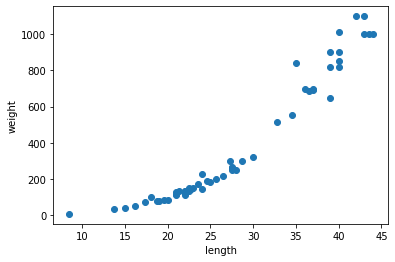

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

- 사이킷런에서 사용할 훈련 세트는 2차원 배열
- percjh_length -> 1차원 배열 -> train_input, test_input -> 1차원 배열
- 1차원 배열 -> 2차원 배열로 변환
  - [1, 2, 3] 크기 : (3, ) -> [[1], [2], [3]] 크기 : (3, 1)
- reshape() 메서드
  - (4,) -> (2, 2)
  - 크기에 -1을 지정하면 나머지 원소 개수로 모두 채움
    - ex) 첫 번째 크기를 나머지 원소 개수로 채우고, 두 번째 크기를 1로 하려면 train_input.reshape(-1, 1)

In [14]:
test_array = np.array([1, 2, 3,4])
print(test_array.shape)

(4,)


In [15]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [16]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수($R^2$)
- k-최근접 이웃 회귄 알고리즘을 구현한 클래스 : KNeighborsRegressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [18]:
print(knr.score(test_input, test_target))

0.992809406101064


- 분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류간 개수의 비율 -> 정확도
- 회귀의 경우 정확한 숫자를 맞힌다는 것은 거의 불가능 -> 예측하는 값이나 타깃 모두 임의의 수치
  - 회귀의 평가 : 결정계수(coefficient of determination), $R^2$
  - $R^2 = 1 - \frac{(타깃 - 예측)^2의\, 합}{(타깃 - 평균)^2의\, 합}$
  - 만약 타깃의 평균 정도를 예측하는 수준이라면 $R^2$은 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 됨

- mean_absolute_error : 타깃과 예측의 절댓값 오차를 평균하여 반환

In [19]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 생성
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합


In [20]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 훈련 세트에서 점수가 굉장히 좋았는 데 테스트 세트에서는 점수가 됭장히 나쁘다면 모델이 훈련 세트에 과대적합(overfitting) -> 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않음
   
- 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우 -> 모델이 훈련세트에 과소적합(underfitting) -> 모델이 너무 단순, 훈련 세트에 적절히 훈련된지 않은 경우
  - 훈련 세트와 테스트 세트의 크기가 매우 작은 경우

- 훈련 세트와 테스트 세트의 점수를 비교했을 때 훈련 세트가 너무 높으면 과대적합, 그 반대이거나 두 점수가 모두 낮으면 과소적합

- 과소적합 문제해결
  - 모델을 조금 더 복잡하게 만든다. -> 훈련 세트에 더 잘 맞게 만든다.
  - k-최근접 이웃 알고리즘의 경우 이웃의 개수 k를 줄이는 것
    - 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해짐
    - 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴에 따름

In [22]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [23]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 마무리

### 키워드로 끝내는 핵심 포인트
- 회귀 : 임의의 수치를 예측하는 문제. 타깃값도 임의의 수치
- k-최근접 이웃 회귀 : k-최근접 이웃 알고리즘을 사용해 회귀 문제 해결. 가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측으로 삼음
- 결정계수($R^2$) : 대표적인 회귀 문제의 성능 측정 도구. 1에 가까울 수록 좋고, 0에 가까울 수록 성능이 나쁨
- 과대적합 : 모델의 훈련 세트의 서능이 테스트 세트 성능보다 훨씬 높을 때 발생. 모델이 훈련 세트에 너무 집착, 데이터에 내재된 거시적인 패턴을 감지하지 못함.
- 과소적합 : 훈련 세트와 테스트 세트 성능이 모두 동일하게 낮거나 테스트 세트 성능이 오히려 더 높을 때 발생. 이런 경우 더 복잡한 모델을 사용해 훈려 세트에 잘 맞는 모델을 만들어야 함

### 핵심 패키지와 함수
> scikit-learn
  - KNeighborsRegressor : k-최근접 이웃 회귀 모델을 만듬. 
    - n_neighbors : 이웃의 개수. 기본값 = 5
  - mean_absolute_error() : 회귀 모델의 평균 절댓값 오차를 계산. 
    - 첫 번째 매개변수 : 타깃
    - 두 번째 매개변수 : 예측값
    - 타깃과 예측을 뺀 값을 제곱한 다음 전체 샘플에 대해 평균한 값을 반환   

> numpy
  - reshape() : 배열의 크기를 바꿈.
    - 바꾸고자 하는 배열의 크기를 매개변수로 전달. 바꾸기 전후의 배열 원소 개수는 동일해야 함
    - 넘파이는 종종 배열의 메서드와 동일한 함수를 별도로 제공
      - 함수의 첫 번째 매개변수는 바꾸조자 하는 배열
        - test_array.reshape(2, 2) -> np.reshape(test_array, (2, 2))